In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Delete the 'Projects' folder if it exists to prevent errors
if os.path.exists('Projects'):
    !rm -rf Projects

# Clone the repository
!git clone https://github.com/springboardmentor468a/Projects.git

# Change your working directory to the 'Projects' folder
os.chdir('Projects')

# Configure your Git identity
!git config --global user.email "sighakollivyshnavi@gmail.com"
!git config --global user.name "Sighakolli Mounica Vaishnavi Shakuntala"

# Create and switch to your new branch
!git checkout -b Imagesegmentation-mounica

Cloning into 'Projects'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 5.53 MiB | 5.09 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Switched to a new branch 'Imagesegmentation-mounica'


In [14]:
# Mount Google Drive to access your files
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the root of your Google Drive
os.chdir('/content/drive/MyDrive')

# Unzip the file
# Replace 'your_file_name.zip' with the actual zip file name
!unzip dataset.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  dataset.zip
replace VOC2012_test/VOC2012_test/Annotations/2008_000200.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [19]:
base_dir = '/content/drive/MyDrive/VOC2012_train_val/VOC2012_train_val'
image_dir = os.path.join(base_dir, 'JPEGImages')
mask_dir = os.path.join(base_dir, 'SegmentationClass')

all_image_names = sorted(os.listdir(image_dir))
images_with_any_object = []
# The PASCAL VOC dataset has IDs for various objects (1-20)
# We can check for any of these
object_class_ids = list(range(1, 21)) # All 20 object categories

count = 0
for image_name in all_image_names:
    mask_name = image_name.replace('.jpg', '.png')
    mask_path = os.path.join(mask_dir, mask_name)

    if os.path.exists(mask_path):
        try:
            mask = Image.open(mask_path)
            mask_np = np.array(mask)

            # Check if any of the object_class_ids are present in the mask
            if any(obj_id in np.unique(mask_np) for obj_id in object_class_ids):
                images_with_any_object.append(image_name)
                count += 1
                if count >= 10:
                    break
        except Exception:
            continue

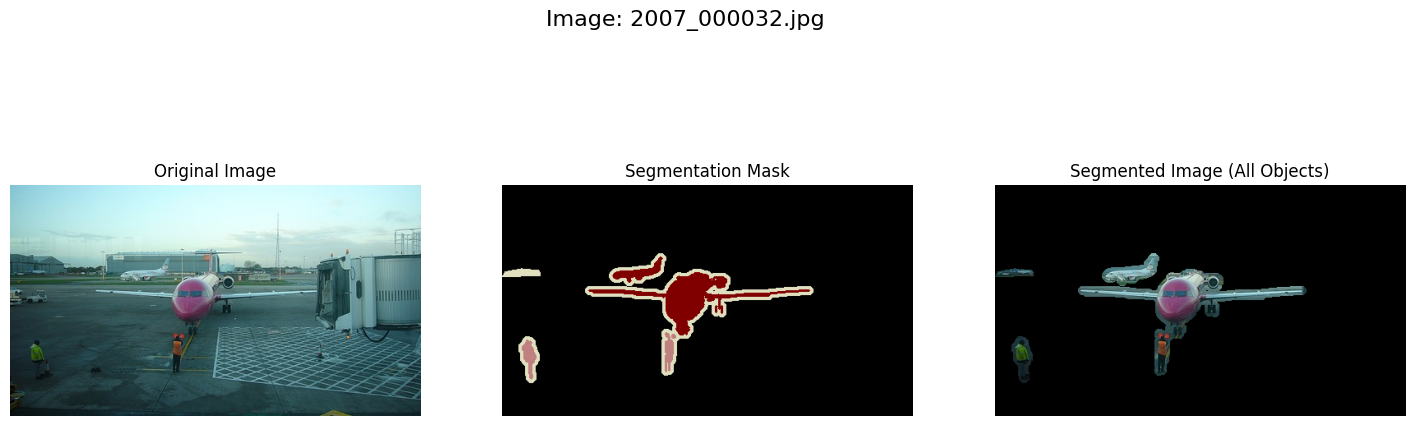

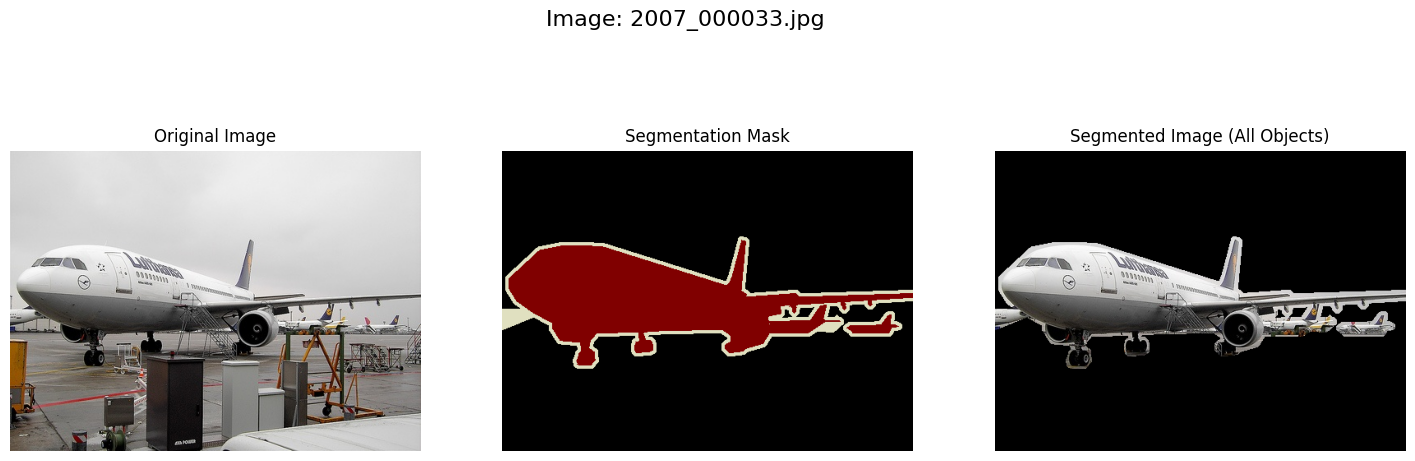

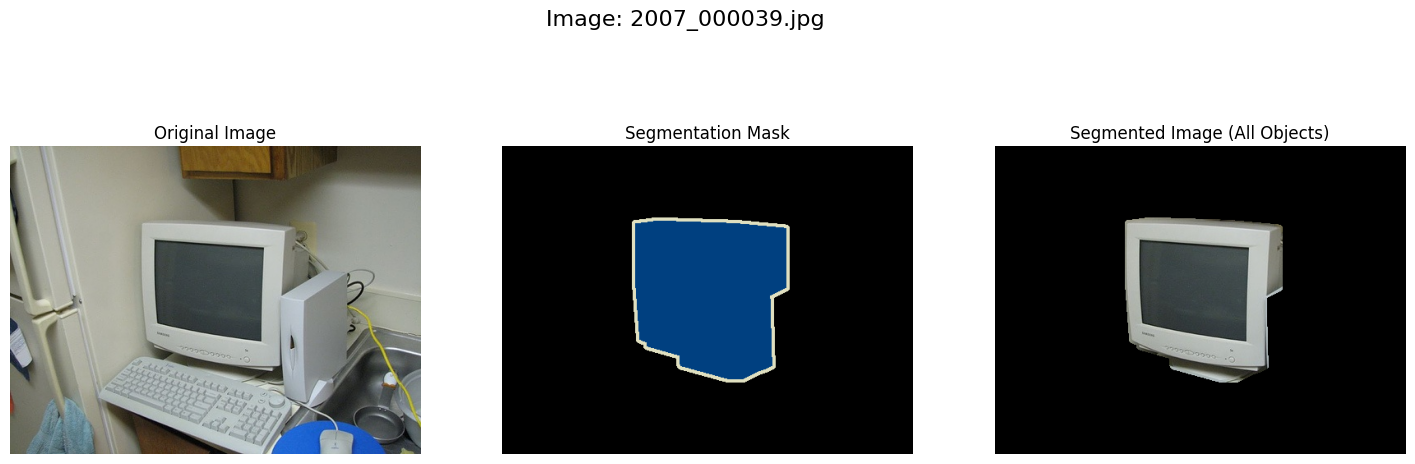

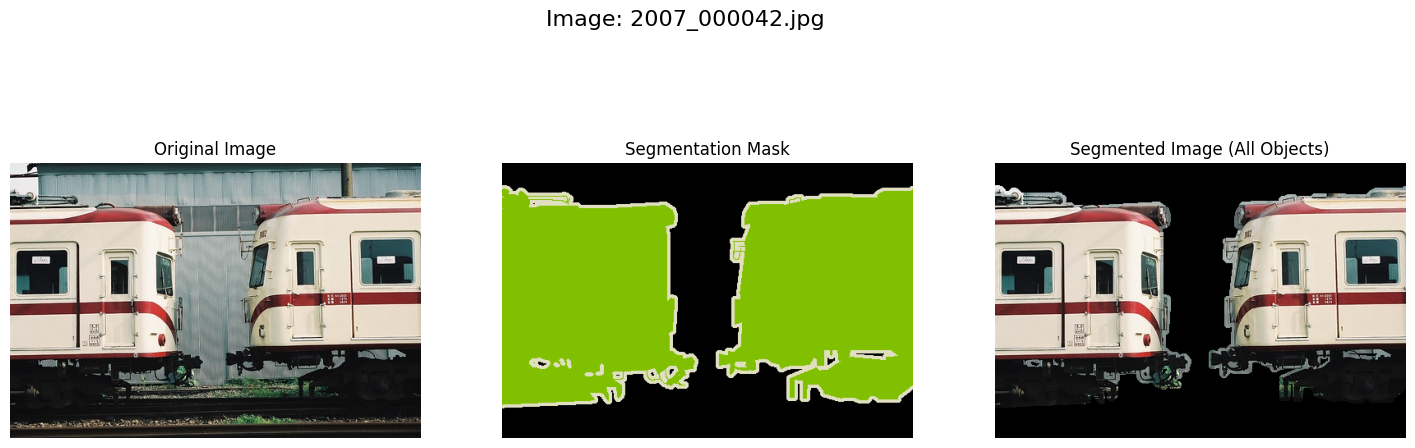

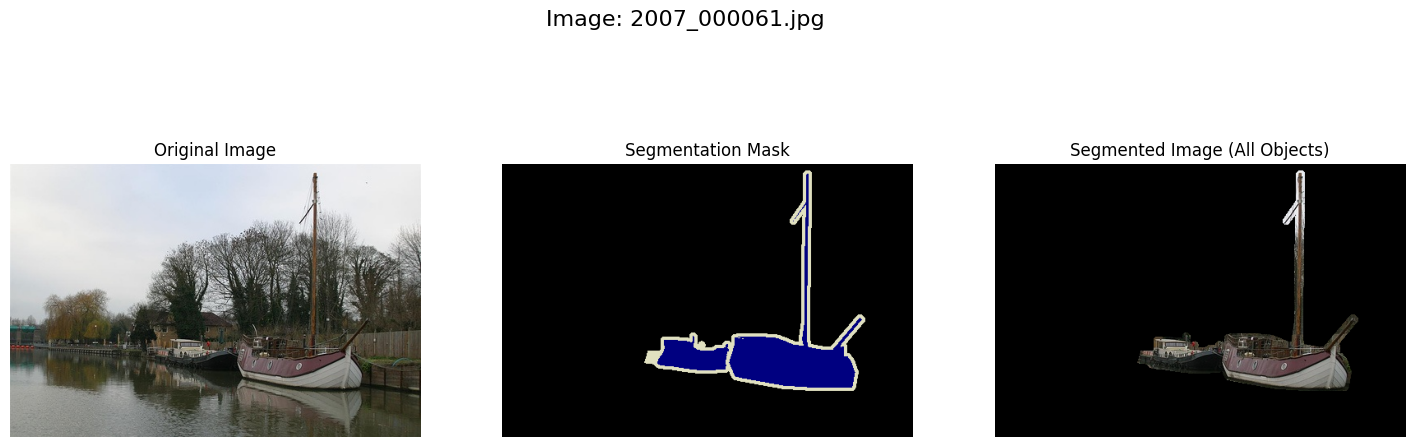

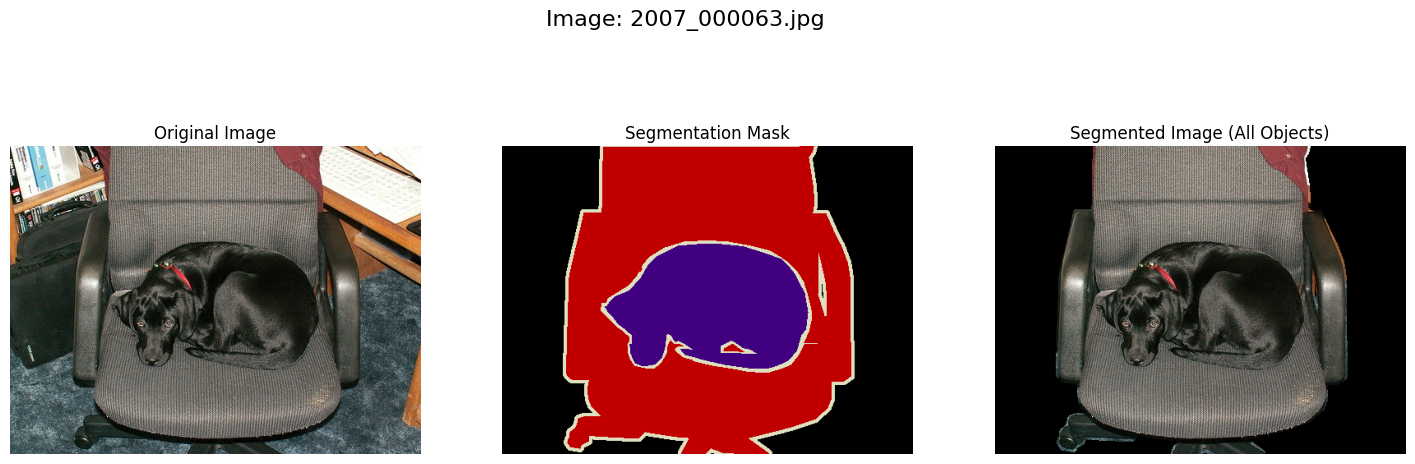

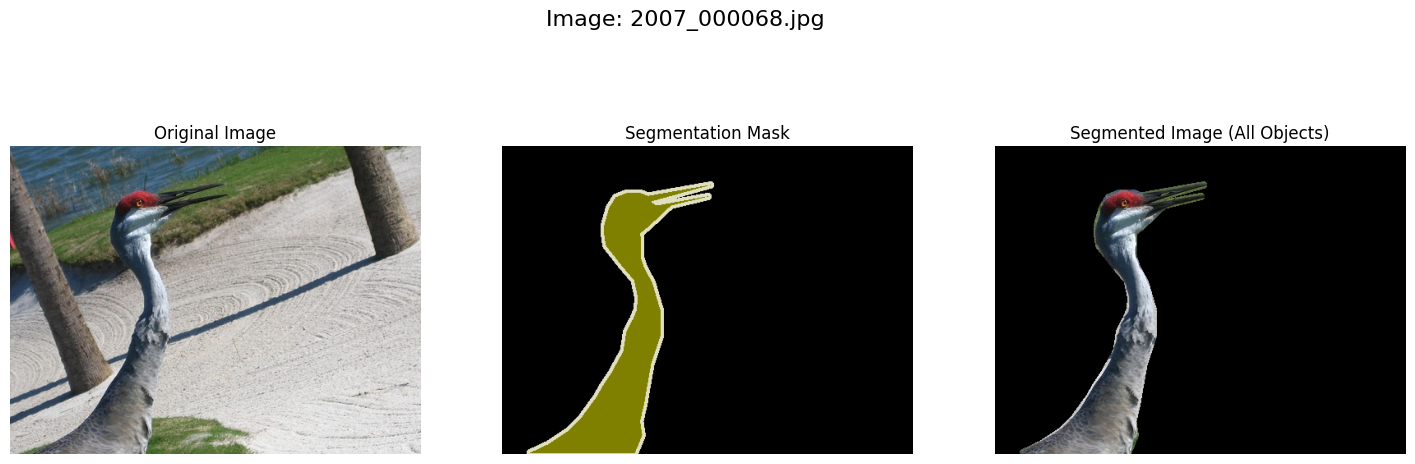

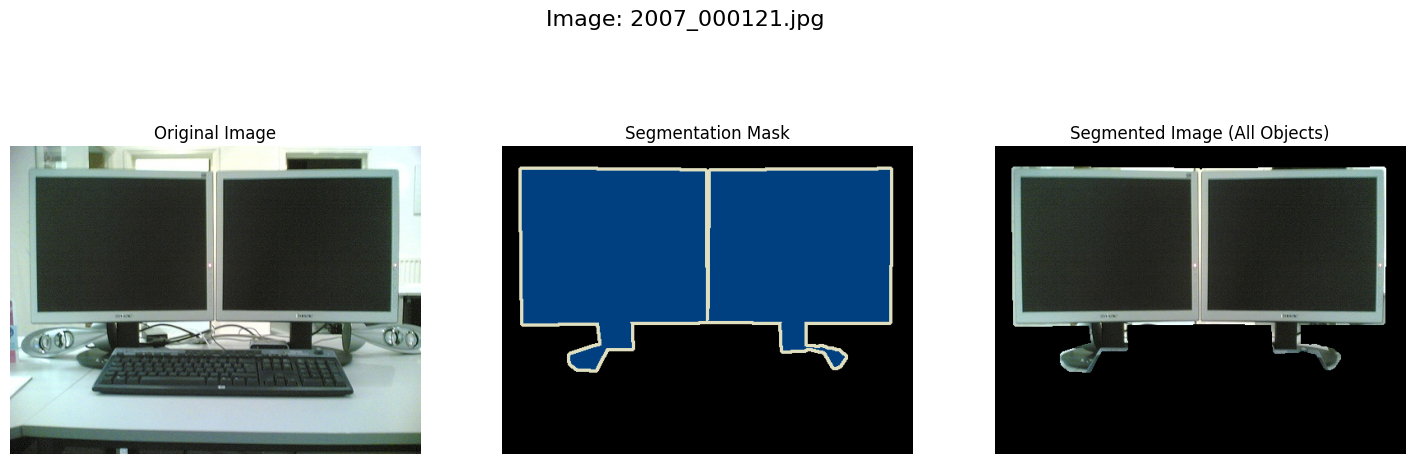

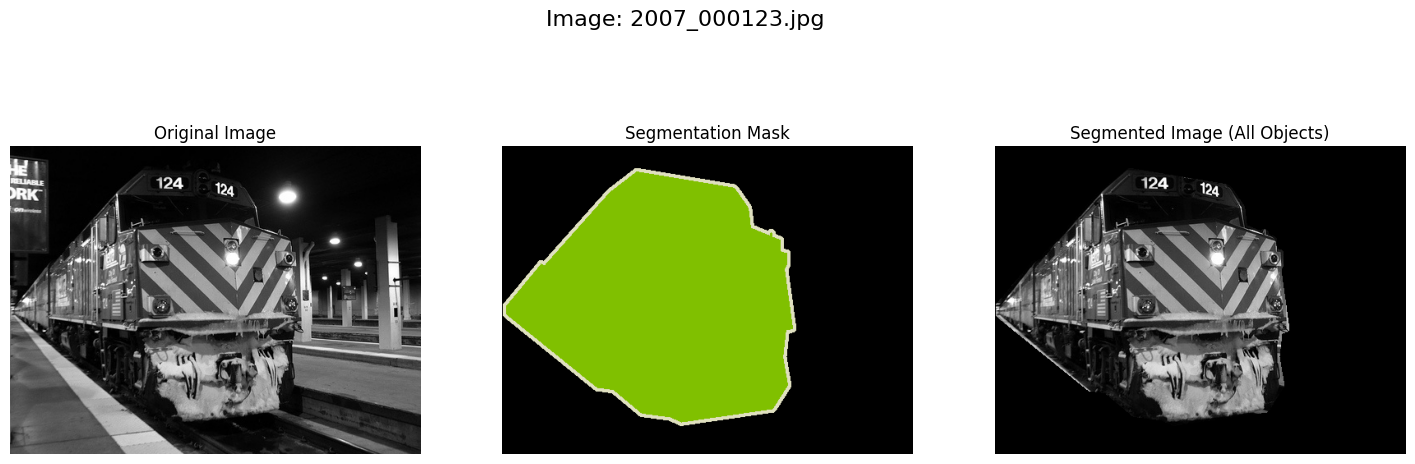

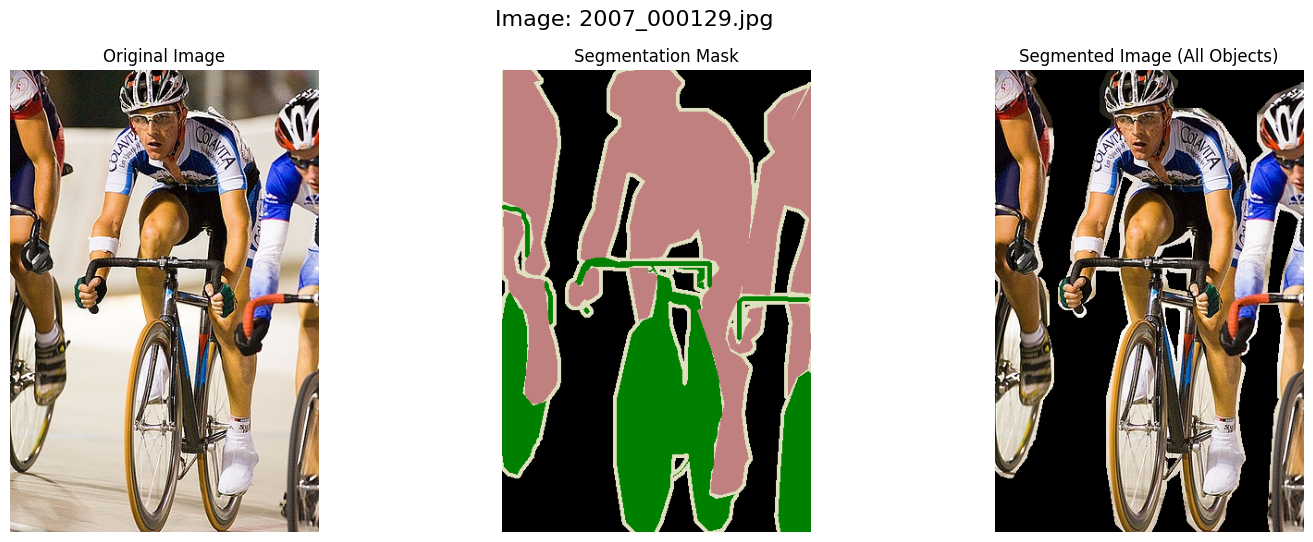

In [21]:
# Update: You need to define the PASCAL VOC class names for better labels
VOC_CLASSES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair',
    'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant',
    'sheep', 'sofa', 'train', 'tvmonitor'
]

# Ensure your base_dir is correct
base_dir = '/content/drive/MyDrive/VOC2012_train_val/VOC2012_train_val'
image_dir = os.path.join(base_dir, 'JPEGImages')
mask_dir = os.path.join(base_dir, 'SegmentationClass')

# 'images_with_any_object' should be defined from your previous filtering step
all_image_names = sorted(os.listdir(image_dir))
images_with_any_object = []
object_class_ids = list(range(1, 21))
count = 0
for image_name in all_image_names:
    mask_name = image_name.replace('.jpg', '.png')
    mask_path = os.path.join(mask_dir, mask_name)
    if os.path.exists(mask_path):
        try:
            mask = Image.open(mask_path)
            mask_np = np.array(mask)
            if any(obj_id in np.unique(mask_np) for obj_id in object_class_ids):
                images_with_any_object.append(image_name)
                count += 1
                if count >= 10:
                    break
        except Exception:
            continue

for image_name in images_with_any_object:
    image_path = os.path.join(image_dir, image_name)
    mask_name = image_name.replace('.jpg', '.png')
    mask_path = os.path.join(mask_dir, mask_name)

    try:
        original_image = Image.open(image_path).convert("RGB")
        original_mask = Image.open(mask_path)

        mask_np = np.array(original_mask)
        all_objects_mask = (mask_np != 0)

        segmented_image_np = np.zeros_like(np.array(original_image))
        segmented_image_np[all_objects_mask] = np.array(original_image)[all_objects_mask]

        fig, ax = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Image: {image_name}', fontsize=16)

        ax[0].imshow(original_image)
        ax[0].set_title('Original Image')
        ax[0].axis('off')

        ax[1].imshow(original_mask)
        ax[1].set_title('Segmentation Mask')
        ax[1].axis('off')

        ax[2].imshow(segmented_image_np.astype(np.uint8))
        ax[2].set_title('Segmented Image (All Objects)')
        ax[2].axis('off')

        plt.show()

    except Exception as e:
        print(f"Failed to process {image_name}: {e}")